In [35]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import scipy.stats

In [51]:
original_data = pd.read_csv("recoded_survey_results.csv")
original_data.describe()

,What is your age (years)?,What is your personal income?,"On average, how many hours per day do you spend on social media?",At what age did you make your first social media account (if applicable)?,To what extent do you agree with the following statement: \nSocial media advertising influences what I purchase.,"To what extent do you agree with the following statement: \nIf someone I trust promotes a product on social media, I am more likely to buy it.",To what extent do you agree with the following statement:\nContents about green products on social media are trustworthy.,How likely are you to buy from clothing resale platforms?,How likely are you to use clothing rental platforms?,What best describes your attitude toward the brand H&M?,To what extent do you believe that H&M is an ethical brand?,To what extent do you believe that H&M is an environmentally sustainable brand?,To what extent do you agree with the following statement:\nI am likely to purchase clothing from H&M in the future.,"To what extent do you agree with the following statement:\nI have the time, resources, money, and willingness to obtain sustainable clothing.",To what extent do you agree with the following statement:\nPurchasing choices can be an effective form of political action.
count,22.000000,19.000000,22.000000,20.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.00000,22.000000,22.000000,22.000000
mean,22.045455,12700.000000,3.990909,12.300000,3.476190,3.681818,2.681818,3.090909,1.681818,2.500000,2.090909,2.00000,2.772727,2.818182,4.045455
std,3.605251,8902.496529,2.028818,1.525226,1.077917,1.170525,1.041353,1.064988,0.838727,1.011835,0.971454,0.92582,1.269864,1.052723,0.898532
min,19.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000
25%,20.000000,4150.000000,3.000000,11.000000,3.000000,3.000000,2.000000,2.250000,1.000000,2.000000,1.000000,1.00000,2.000000,2.000000,3.250000
50%,21.500000,17000.000000,4.000000,12.000000,4.000000,4.000000,2.500000,3.000000,1.500000,2.500000,2.000000,2.00000,3.000000,3.000000,4.000000
75%,22.750000,20000.000000,5.000000,13.000000,4.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.00000,4.000000,3.750000,5.000000
max,36.000000,25000.000000,8.000000,17.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.00000,5.000000,5.000000,5.000000


In [52]:
new_names = ['timestamp','acknowledgement','age','gender','race','income','major','minor','grad_class','sm_hours_per_day','age_first_sm','sm_platforms','sm_topics','sm_activities','freq_feed_promote_env','sm_ads_influence','sm_trust_promote_influence','sm_trust', 'resale_likelihood','rental_likelihood','hm_attitude','hm_ethical','hm_env_sustain','hm_purchase_likelihood','sustainable_purchase_ability','purchase_intention','buycott','boycott','purchase_political']

In [53]:
renaming = {old:new for old,new in zip(original_data.columns, new_names)}

In [54]:
cleaned = original_data.rename(renaming, axis=1)
cleaned = cleaned.drop(columns=["timestamp", "acknowledgement"])
cleaned["race"] = cleaned["race"].str.split(',')
cleaned["sm_platforms"] = cleaned["sm_platforms"].str.split(',')
cleaned["sm_activities"] = cleaned["sm_activities"].str.split(',')
cleaned["sm_topics"] = cleaned["sm_topics"].str.split(',')
cleaned["age_first_sm"].fillna(cleaned["age_first_sm"].mean(), inplace=True)
cleaned['freq_feed_promote_env'].replace({"Often": 2,"Sometimes": 1,"Never": 0}, inplace=True)
cleaned['sm_ads_influence'].fillna(cleaned['sm_ads_influence'].mean(), inplace=True)
cleaned['income'].fillna(cleaned['income'].mean(), inplace=True)
# cleaned.head(2)

### Overview

In [55]:
cleaned.describe()

,age,income,sm_hours_per_day,age_first_sm,freq_feed_promote_env,sm_ads_influence,sm_trust_promote_influence,sm_trust,resale_likelihood,rental_likelihood,hm_attitude,hm_ethical,hm_env_sustain,hm_purchase_likelihood,sustainable_purchase_ability,purchase_political
count,22.000000,22.000000,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.00000,22.000000,22.000000,22.000000
mean,22.045455,12700.000000,3.990909,12.30000,1.090909,3.476190,3.681818,2.681818,3.090909,1.681818,2.500000,2.090909,2.00000,2.772727,2.818182,4.045455
std,3.605251,8242.110224,2.028818,1.45078,0.610159,1.051939,1.170525,1.041353,1.064988,0.838727,1.011835,0.971454,0.92582,1.269864,1.052723,0.898532
min,19.000000,0.000000,0.000000,10.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000
25%,20.000000,8000.000000,3.000000,11.25000,1.000000,3.000000,3.000000,2.000000,2.250000,1.000000,2.000000,1.000000,1.00000,2.000000,2.000000,3.250000
50%,21.500000,13850.000000,4.000000,12.00000,1.000000,4.000000,4.000000,2.500000,3.000000,1.500000,2.500000,2.000000,2.00000,3.000000,3.000000,4.000000
75%,22.750000,20000.000000,5.000000,13.00000,1.000000,4.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.00000,4.000000,3.750000,5.000000
max,36.000000,25000.000000,8.000000,17.00000,2.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.00000,5.000000,5.000000,5.000000


### Q1: What is the relationship between social media usage and perception of fast fashion brands, green purchase intention, and political consumerism?

##### independent variable

In [7]:
sm_usage = cleaned[['age','sm_hours_per_day','age_first_sm','sm_platforms']]
sm_years = sm_usage['age']-sm_usage['age_first_sm']
sm_usage = sm_usage['sm_hours_per_day']*sm_years
# sm_usage

##### dependent variables

In [8]:
attitude = cleaned[['hm_attitude','hm_ethical','hm_env_sustain']].mean(axis=1)
# attitude

In [9]:
consumption = cleaned['hm_purchase_likelihood']
# consumption

In [10]:
gpi = cleaned[['freq_feed_promote_env', 'sm_ads_influence', 'sm_trust_promote_influence', 'sm_trust', 
                'resale_likelihood', 'rental_likelihood', 'sustainable_purchase_ability']]
gpi = (gpi['freq_feed_promote_env']* gpi['sm_ads_influence'] * gpi['sm_trust_promote_influence']*
        gpi['sm_trust'] + gpi['resale_likelihood'] + gpi['rental_likelihood']) * gpi['sustainable_purchase_ability'] 
# gpi

In [11]:
political_consumerism = cleaned[['buycott', 'boycott', 'purchase_political']]
political_consumerism['buycott'] = political_consumerism['buycott']=="I have"
political_consumerism['boycott'] = political_consumerism['boycott']=="I have"
political_consumerism = political_consumerism.sum(axis=1)
# political_consumerism

##### correlations

array([[ 1.        , -0.03818597],
       [-0.03818597,  1.        ]])

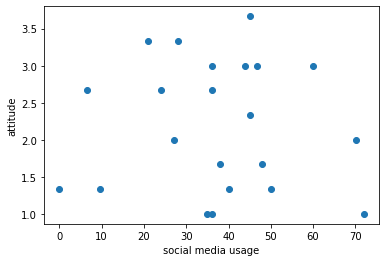

In [12]:
plt.scatter(sm_usage, attitude)
plt.xlabel("social media usage")
plt.ylabel("attitude")
np.corrcoef(sm_usage, attitude)

array([[ 1.        , -0.03010165],
       [-0.03010165,  1.        ]])

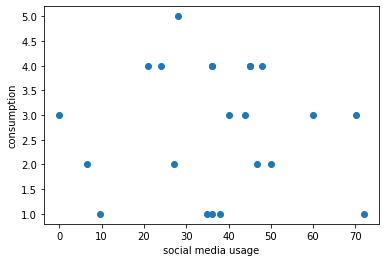

In [13]:
plt.scatter(sm_usage, consumption)
plt.xlabel("social media usage")
plt.ylabel("consumption")
np.corrcoef(sm_usage, consumption)

array([[1.        , 0.07581868],
       [0.07581868, 1.        ]])

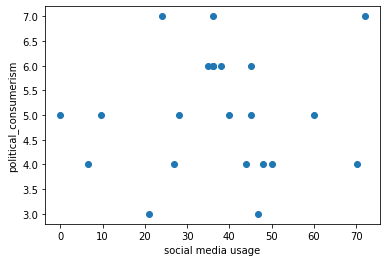

In [14]:
plt.scatter(sm_usage, political_consumerism)
plt.xlabel("social media usage")
plt.ylabel("political_consumerism")
np.corrcoef(sm_usage, political_consumerism)

array([[1.        , 0.41285034],
       [0.41285034, 1.        ]])

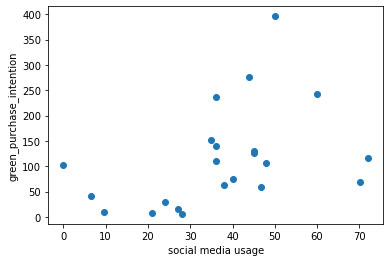

In [15]:
plt.scatter(sm_usage, gpi)
plt.xlabel("social media usage")
plt.ylabel("green_purchase_intention")
np.corrcoef(sm_usage, gpi)

### Q2: What types of social media content/activities are related to perception of fast fashion brands, green purchase intention, and political consumerism?


In [16]:
cleaned[['sm_platforms', 'sm_topics',
       'sm_activities']].head()

,sm_platforms,sm_topics,sm_activities
0,"[Tik Tok, Youtube, Twitter]",[Other],"[Liking/upvoting/rating, Commenting, Followi..."
1,"[Instagram, Facebook, Youtube, Discord, Tw...",[Animals],[None]
2,"[Instagram, Tik Tok, Facebook, Youtube, Ye...",[News/Politics/Social Justice],"[Following companies, Viewing slides/threads ..."
3,"[Instagram, Tik Tok, Twitter, Youtube, Yel...","[Makeup, Animals, Aesthetic, Cultural]","[Liking/upvoting/rating, Commenting, Posting..."
4,"[Instagram, Tik Tok, Twitter, Youtube, Yel...","[Food, Animals, Friends]","[Liking/upvoting/rating, Commenting, Posting..."


In [17]:
categories = {"Image/Video":["Instagram", "Tik Tok", "Facebook", "Youtube", "Pinterest", "Snapchat", "BeReal",  "Snapchat", "LinkedIn"], 
              "Text/Review/Blog":["Twitter", "Tumblr", "Goodreads", "Yelp"], 
              "Fashion":["Poshmark", "Depop"], 
              "Other":["Discord", "Reddit", "Twitch"]}

In [22]:
platforms = pd.DataFrame({"Image/Video":[], "Text/Review/Blog":[], "Fashion":[], "Other":[]})
for p in platforms:
    def category(row):
        for platform in row:
            if platform.strip() in categories[p]:
                return 1
        return 0
    platforms[p] = cleaned["sm_platforms"].apply(category)
platforms["Attitude"] = attitude
platforms["Consumption"] = consumption
platforms["Green Purchase Intention"] = gpi
platforms["Political Consumerism"] = political_consumerism
# platforms

In [27]:
platforms.corr()[['Attitude', 'Consumption', 'Green Purchase Intention', 'Political Consumerism']].iloc[:4]

,Attitude,Consumption,Green Purchase Intention,Political Consumerism
Image/Video,NaN,NaN,NaN,NaN
Text/Review/Blog,-0.158182,0.090009,0.398173,0.188287
Fashion,NaN,NaN,NaN,NaN
Other,-0.147728,-0.125140,-0.014845,-0.056095


In [25]:
activities = pd.DataFrame({"Liking/upvoting/rating":[], 
                          "Commenting":[], 
                          "Posting images or videos":[], 
                          "Posting text":[],
                          "Following people":[], 
                          "Following companies":[], 
                          "Sharing posts by other users":[], 
                          "Sharing slides/threads about current events":[],
                          "Viewing slides/threads about current events":[], 
                          "None":[]})
for i in range(len(activities.columns)):
    def activity(row):
        for activity in row:
            if activity.strip() == activities.columns[i]:
                return 1
        return 0
    activities[activities.columns[i]] = cleaned["sm_activities"].apply(activity)
activities["Attitude"] = attitude
activities["Consumption"] = consumption
activities["Green Purchase Intention"] = gpi
activities["Political Consumerism"] = political_consumerism
# activities

In [28]:
activities.corr()[['Attitude', 'Consumption', 'Green Purchase Intention', 'Political Consumerism']].iloc[:10]

,Attitude,Consumption,Green Purchase Intention,Political Consumerism
Liking/upvoting/rating,-0.214413,0.162928,0.209025,0.112223
Commenting,-0.074783,0.274249,0.097987,0.188899
Posting images or videos,-0.017809,0.403009,0.047790,0.191600
Posting text,0.018176,0.194442,0.036280,-0.109509
Following people,-0.171917,0.337778,0.166341,0.295104
Following companies,-0.068280,0.020067,0.169553,0.118936
Sharing posts by other users,-0.417331,0.090009,-0.040684,0.267947
Sharing slides/threads about current events,-0.228855,0.152420,-0.093839,-0.109823
Viewing slides/threads about current events,-0.195203,0.166171,0.183870,-0.050693
None,0.236531,-0.196957,-0.206685,-0.412008
